<p style="text-align:center; color:red; font-size:24px; font-weight:bold;">
    PHISHING URL WEBSITE
</p>


## Objective :
To analyze these features and implement machine learning techniques to classify URLs as legitimate or phishing, improving the accuracy and efficiency of phishing detection systems. Through this project, we aim to contribute to the development of automated security solutions that help protect users from online fraud and cyber threats.

##  <h4 style="color:green;"> Import Libraries And Load Data</h4>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import joblib

In [2]:
data = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [3]:
df=pd.DataFrame(data)
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
df.tail(3)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [5]:
df.shape

(235795, 56)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
URLLength,235795.0,34.573095,41.314153,13.000000,23.000000,27.000000,34.000000,6.097000e+03
DomainLength,235795.0,21.470396,9.150793,4.000000,16.000000,20.000000,24.000000,1.100000e+02
IsDomainIP,235795.0,0.002706,0.051946,0.000000,0.000000,0.000000,0.000000,1.000000e+00
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.000000,100.000000,1.000000e+02
CharContinuationRate,235795.0,0.845508,0.216632,0.000000,0.680000,1.000000,1.000000,1.000000e+00
TLDLegitimateProb,235795.0,0.260423,0.251628,0.000000,0.005977,0.079963,0.522907,5.229071e-01
URLCharProb,235795.0,0.055747,0.010587,0.001083,0.050747,0.057970,0.062875,9.082366e-02
TLDLength,235795.0,2.764456,0.599739,2.000000,2.000000,3.000000,3.000000,1.300000e+01
NoOfSubDomain,235795.0,1.164758,0.600969,0.000000,1.000000,1.000000,1.000000,1.000000e+01
HasObfuscation,235795.0,0.002057,0.045306,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [8]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

## <h3 style="color:purple; font-weight:bold">LET'S DO EDA </h3>

In [9]:
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [10]:
df.duplicated().sum()

0

<h2 style="color:purple; font-weight:bold">Here we can analyze whether our data is balanced or not</h2>  

In [11]:
counts=df.label.value_counts()

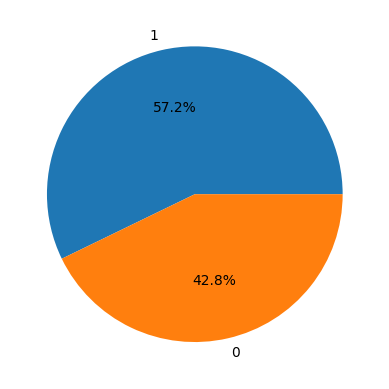

In [12]:
plt.pie(counts,labels=counts.index ,autopct='%1.1f%%')
plt.show()

### The label column is slightly imbalanced. which does not affect the model accuracy.

## <h2 style="color:green;">We can divide the df into categorical and numerical columns </h2>


In [13]:
cat_col = df.select_dtypes(include='object')
num_col =df.select_dtypes(include='number')

In [14]:
## now analyze Cat_column
cat_col.head(3)

,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton


In [15]:
print(df['FILENAME'].value_counts())

FILENAME
521848.txt      1
96605.txt       1
oph08639.txt    1
8024072.txt     1
8014599.txt     1
               ..
611368.txt      1
786974.txt      1
8008024.txt     1
702558.txt      1
384822.txt      1
Name: count, Length: 235795, dtype: int64


In [16]:
## Here, we can remove 'Filename'  as they are irrelevant to our training model. 
df2 = df.drop(columns=['FILENAME'],axis=1)
df2.head(2)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1


## Lets analyse  URL and Domain 	

In [17]:
df2.URL.value_counts()

URL
https://disclosepack.myportfolio.com/                                                         2
https://barlandas.com/reprisedefunction/unzupdm/                                              2
http://app-batasotak1244acces.kvoiffugw9-yk26ed5vg379.p.temp-site.link/termsofservice.html    2
https://fleek.ipfs.io/ipfs/qmzt2xz7uq7tdgiirmv7u7zaabtfhjn8jzouurbptgtgal/                    2
https://sucursalvirtualpersona.la-empresaempre.repl.co/                                       2
                                                                                             ..
https://www.clothdiaperkids.com                                                               1
https://www.toucansolution.com                                                                1
https://www.tirnavos.gr                                                                       1
https://www.lovehappyhour.com                                                                 1
https://www.alternativefinland.com  

### Domain 

In [18]:
print(df2['Domain'].value_counts().head(10))

Domain
ipfs.io                         1197
docs.google.com                  526
mail.deliverylifesupport.com     370
cloudflare-ipfs.com              359
storageapi.fleek.co              318
gateway.pinata.cloud             275
gateway.ipfs.io                  249
ipfs.litnet.work                 223
cf-ipfs.com                      190
s3.amazonaws.com                 182
Name: count, dtype: int64


In [19]:
print("url:",df2.URL.nunique())
print("Domain:",df2.Domain.nunique())

url: 235370
Domain: 220086


<h4 style="color:blue"> Here we can drop url why => It’s a unique identifier and won’t help in modeling directly.The URL column has 235370 unique values,meaning almost every URL is unique.Label Encoding would assign arbitrary numbers, but the model wouldn’t learn meaningful patterns</h4>

 
 <h4 style="color:blue"> NOW we can drop domain and URL why->Avoids high cardinality, reduces memory usage.Label encoding adds no meaningful order, ineffective for high-cardinality data </h4>




In [20]:
df3 = df2.drop(columns=['Domain','URL'],axis=1)  
df3.head(3)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1


### we can analyze Title

In [21]:
df3.Title.value_counts()

Title
0                                                                            32719
#NAME?                                                                          21
65gfgfgfgfg4g4gblogspot?m=1                                                     12
gov                                                                             11
info-update-sucreeblogspot                                                      10
                                                                             ...  
btinternet-102138weeblysite                                                      1
thecheeseweb                                                                     1
thewillowlabel                                                                   1
ipfslitnetipfsbafybeieejhl3a4adbxorcjdmaiejtskbbgkdgsdlidc2igre64pphfcwta        1
alternativefinland                                                               1
Name: count, Length: 197874, dtype: int64

In [22]:
df3.Title.nunique()

197874

## <h3 style="color:Purple;"> here i am removing Title column becz a page title might not directly indicate whether a URL is phishing or legitimateAttackers can fake or randomize titles, making them unreliable. </h3>

In [23]:
df4 = df3.drop('Title',axis=1)

## Lets Analyze TLD

In [24]:
df4.TLD.value_counts()

TLD
com      112554
org       18793
net        7097
app        6508
uk         6395
          ...  
47            1
sharp         1
faith         1
243           1
ne            1
Name: count, Length: 695, dtype: int64

In [25]:
df4.TLD.nunique()

695

In [26]:
top_10_tlds = df4["TLD"].value_counts().nlargest(10)
top_10_tlds_df = top_10_tlds.reset_index()
# top_10_tlds_df.columns = ["TLD", "count"] 

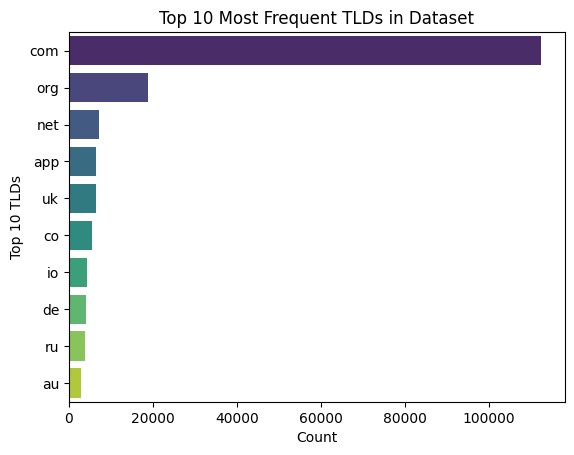

In [27]:
sns.barplot(y=top_10_tlds_df["TLD"], x=top_10_tlds_df["count"], palette="viridis")
plt.xlabel("Count")
plt.ylabel("Top 10 TLDs")
plt.title("Top 10 Most Frequent TLDs in Dataset")
plt.show()

In [28]:
tld_counts = df4["TLD"].value_counts() 
Less_than_20k = tld_counts[tld_counts < 20000] 
print(Less_than_20k)

TLD
org      18793
net       7097
app       6508
uk        6395
co        5422
         ...  
47           1
sharp        1
faith        1
243          1
ne           1
Name: count, Length: 694, dtype: int64


In [29]:
#filter those below 20K, and group them as "Other"
df4['TLD'] = df4['TLD'].apply(lambda x : "Other" if x in Less_than_20k else x)

In [30]:
df4['TLD'].value_counts()

TLD
Other    123241
com      112554
Name: count, dtype: int64

## <h2 style="color:green;"> Now We can Analyze  Numerical Columns</h2>

In [31]:
num_cols = df4.select_dtypes(include='number')
num_cols.head(10)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1
5,30,23,0,100.0,1.000000,0.079963,0.060614,3,1,0,...,0,0,1,35,1,11,86,0,14,1
6,25,18,0,100.0,1.000000,0.522907,0.063549,3,1,0,...,0,0,1,32,4,14,44,2,17,1
7,25,18,0,100.0,1.000000,0.522907,0.060486,3,1,0,...,0,0,1,24,2,22,36,0,15,1
8,29,22,0,100.0,1.000000,0.005084,0.056980,2,1,0,...,0,0,1,71,4,9,40,1,317,1
9,18,11,0,100.0,1.000000,0.079963,0.070497,3,1,0,...,0,0,1,10,1,12,173,6,65,1


In [32]:
num_cols.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [33]:
df4.shape

(235795, 52)

In [34]:
for col in num_cols:
    print(df4.groupby(col)[col].agg('count'))
    print("\n")

URLLength
13         5
14        51
15       236
16       486
17      1933
        ... 
4054       1
4246       1
4274       1
5794       1
6097       1
Name: URLLength, Length: 482, dtype: int64


DomainLength
4       256
5       256
6       298
7      1478
8       334
       ... 
101       4
102       1
104       2
105       1
110       1
Name: DomainLength, Length: 101, dtype: int64


IsDomainIP
0    235157
1       638
Name: IsDomainIP, dtype: int64


URLSimilarityIndex
0.155574           1
0.197141           1
0.304877           1
0.317642           1
0.321463           1
               ...  
96.427789          1
96.666080          1
96.874552          1
97.004449          1
100.000000    135636
Name: URLSimilarityIndex, Length: 36360, dtype: int64


CharContinuationRate
0.000000         4
0.037736         1
0.055556         1
0.072727         1
0.081633         1
             ...  
0.958333         2
0.960000         2
0.966667         1
0.968750         1
1.000000    139965
Name:

In [35]:
binary_columns = [col for col in num_cols.columns if num_cols[col].nunique()==2]
binary_columns

['IsDomainIP',
 'HasObfuscation',
 'IsHTTPS',
 'HasTitle',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'HasDescription',
 'HasExternalFormSubmit',
 'HasSocialNet',
 'HasSubmitButton',
 'HasHiddenFields',
 'HasPasswordField',
 'Bank',
 'Pay',
 'Crypto',
 'HasCopyrightInfo',
 'label']

In [36]:
other_columns = [col for col in num_cols.columns if num_cols[col].nunique() > 2]
other_columns


['URLLength',
 'DomainLength',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL',
 'LineOfCode',
 'LargestLineLength',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'NoOfPopup',
 'NoOfiFrame',
 'NoOfImage',
 'NoOfCSS',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef',
 'NoOfExternalRef']

## Here, we divide numerical columns into binary and other types, then we can visualize them

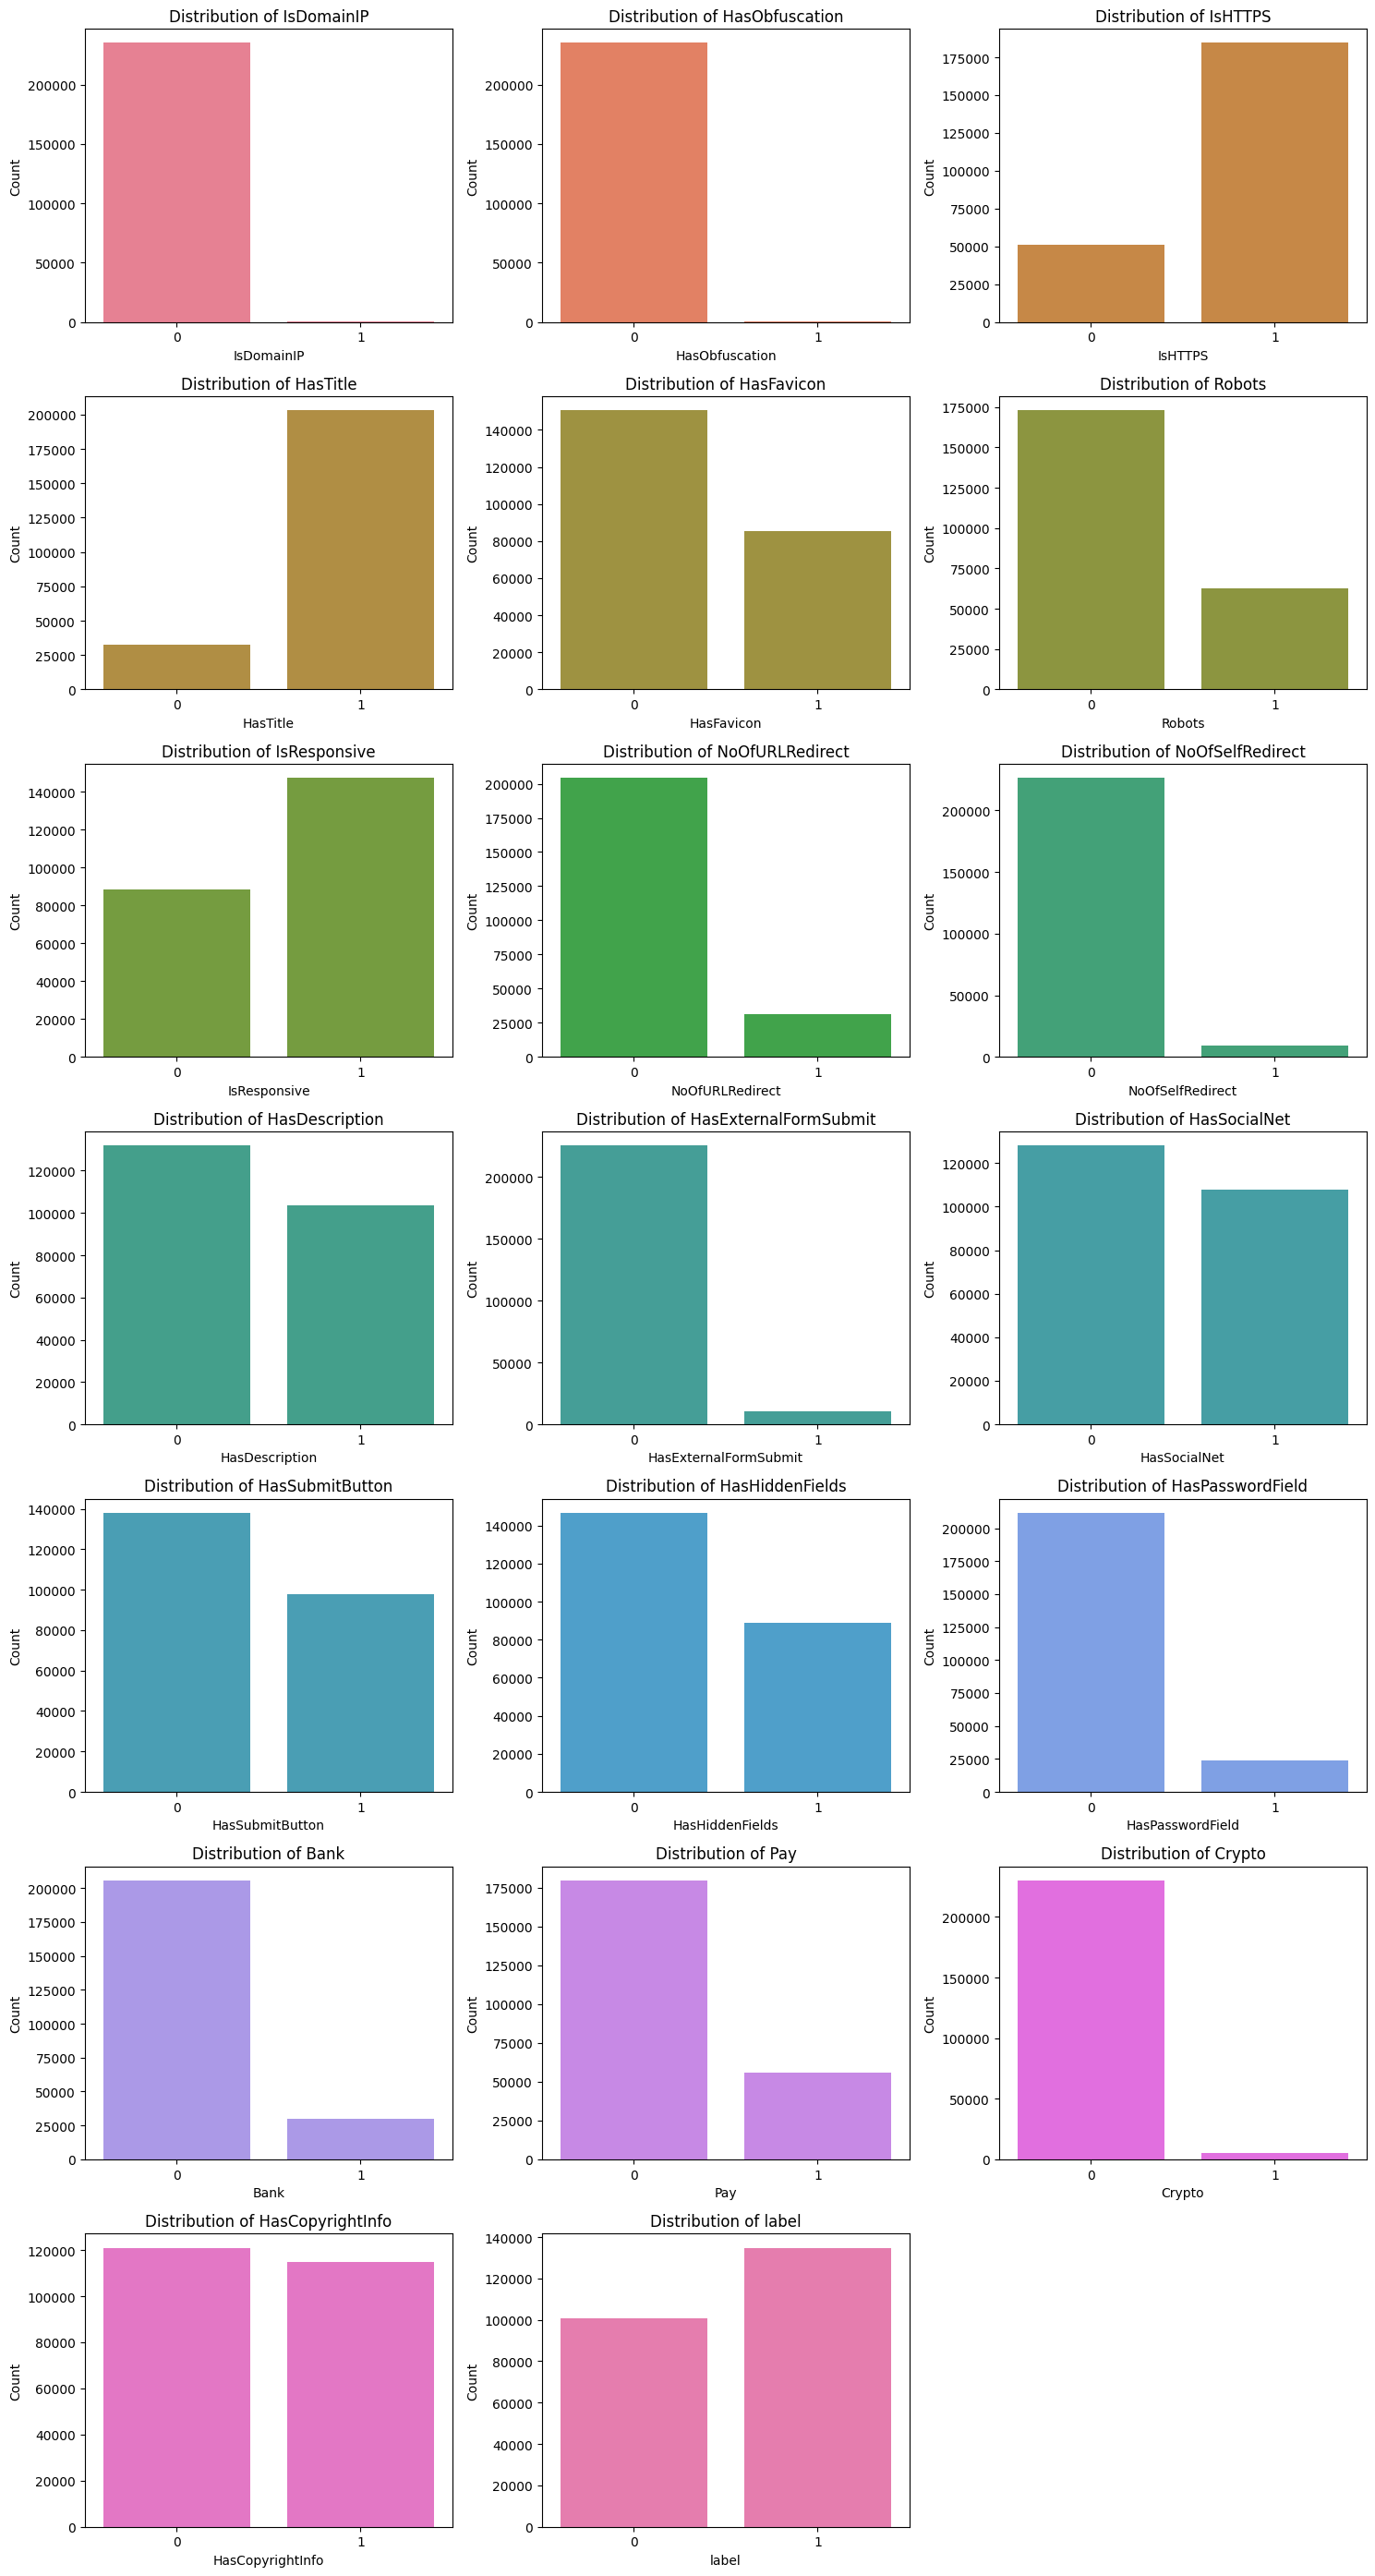

In [37]:
# Plot each binary column separately
# for col in binary_columns:
#     plt.figure(figsize=(6, 4)) 
#     sns.countplot(x=df4[col])

num_cols = len(binary_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange in 3 columns per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Dynamic figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Define a color palette
colors = sns.color_palette("husl", num_cols)  

# Plot each binary column
for i, col in enumerate(binary_columns):
    sns.countplot(x=df[col], ax=axes[i], palette=[colors[i]])  
    axes[i].set_title(f"Distribution of {col}")  
    axes[i].set_xlabel(col)  
    axes[i].set_ylabel("Count")  

# Hide any unused subplots (if columns < grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show() 


##  now we can analyze how other column is distributed

In [38]:
# plt.figure(figsize=(18,12))
# for i, col in enumerate(other_columns):
#     plt.subplot(5, 3, i + 1)
#     sns.histplot(df4[col], bins=30, kde=True, color="red")
#     plt.title(f"Distribution of {col}")
#     plt.vlines(df4[col].mean(),ymin =0,ymax=50,label="mean")
#     plt.vlines(df4[col].median(),ymin =0,ymax=50,label="median",color='green')
#     plt.legend()
# plt.tight_layout()
# plt.show()

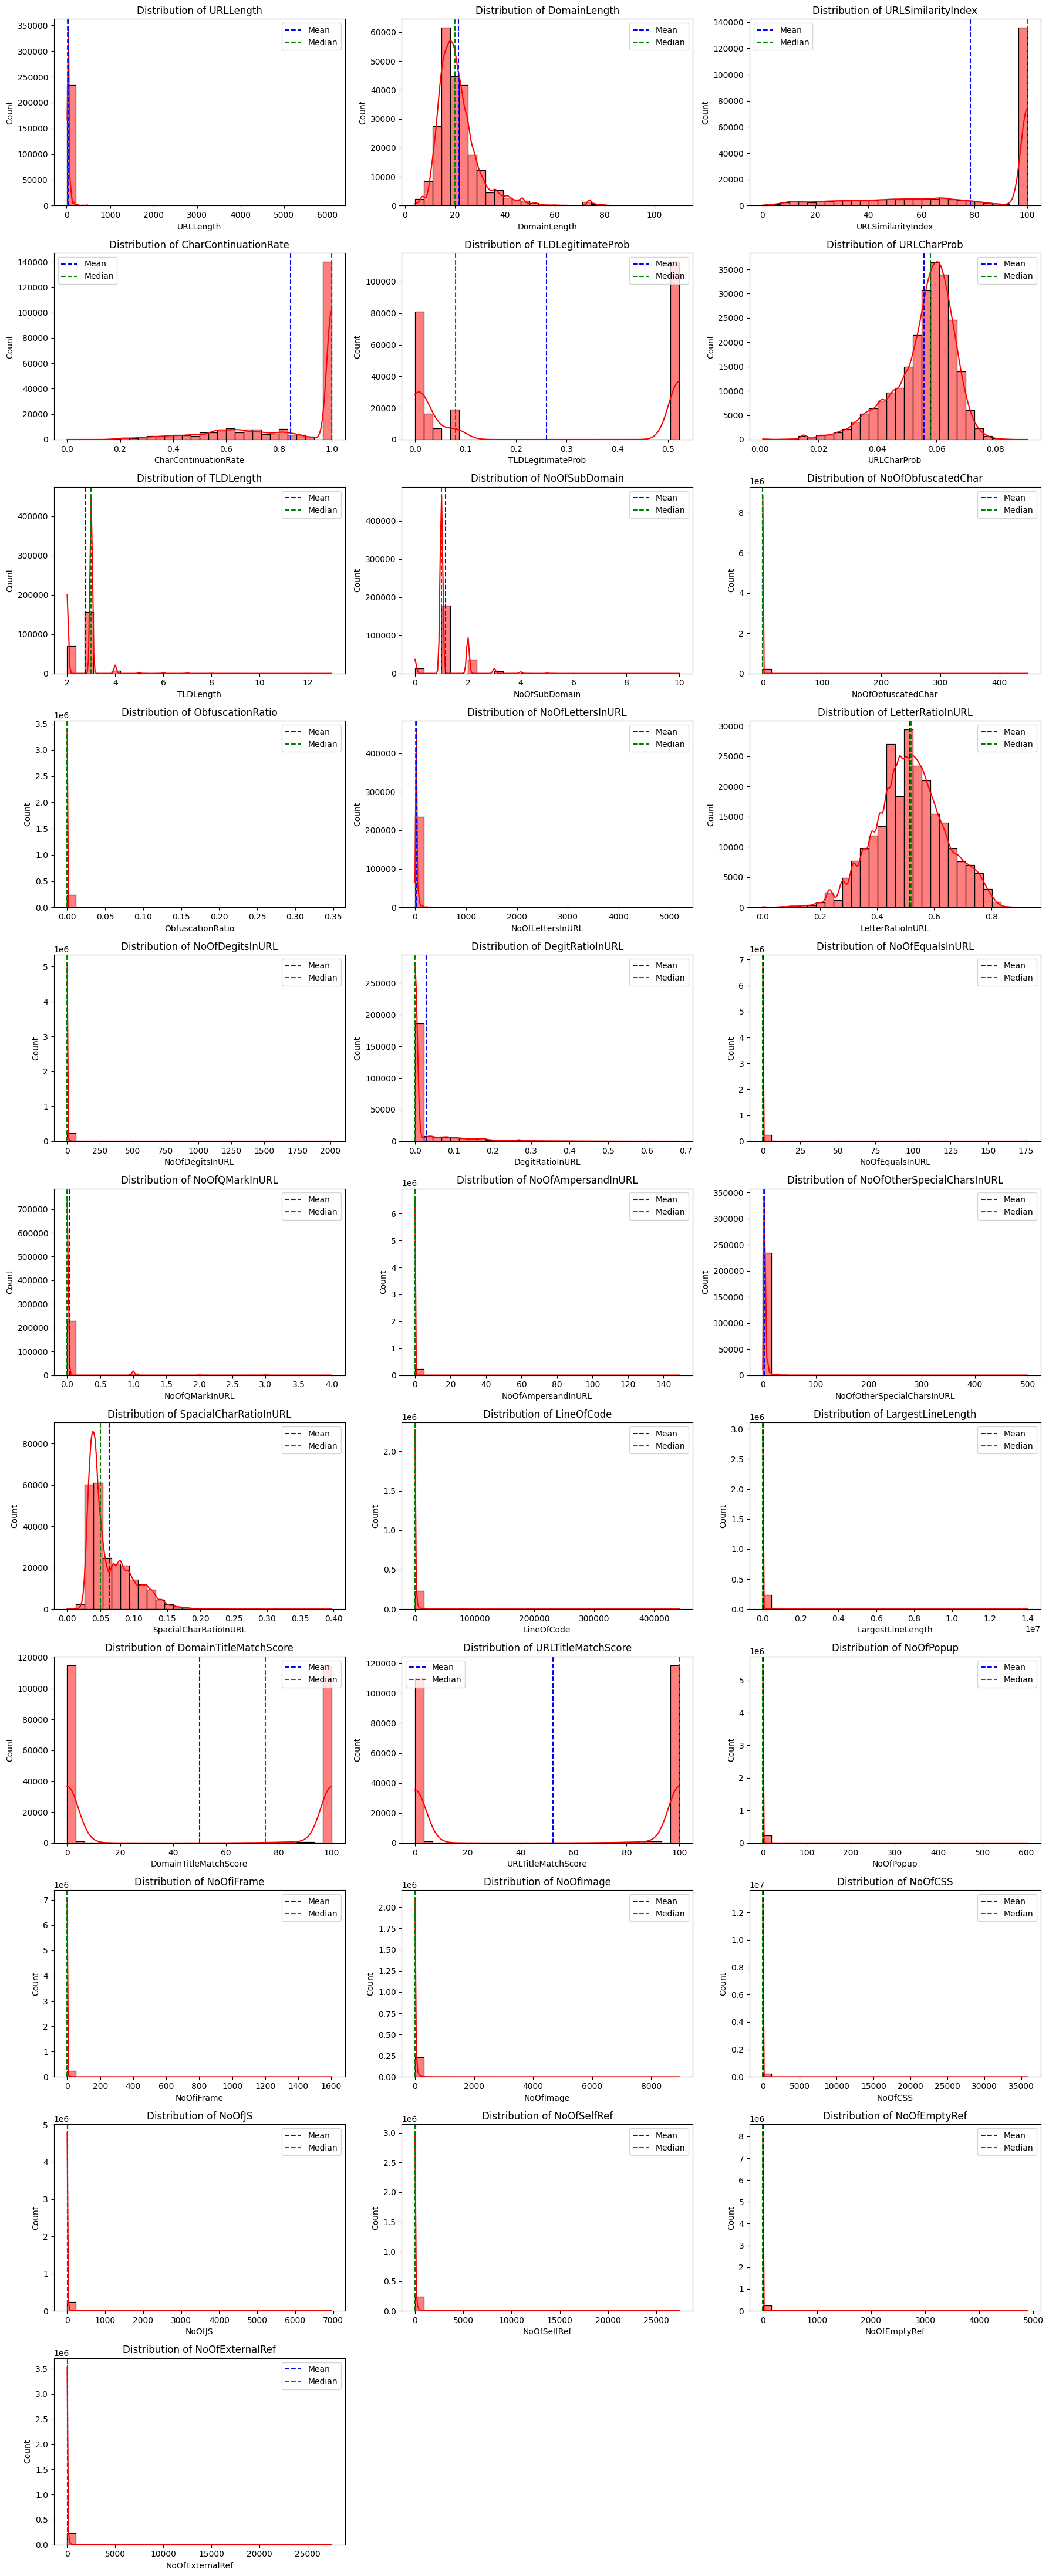

In [39]:
num_cols = len(other_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust rows based on number of columns

plt.figure(figsize=(18, rows * 4))  # Dynamic height

for i, col in enumerate(other_columns):
    plt.subplot(rows, 3, i + 1)  # Adjust grid dynamically
    sns.histplot(df4[col], bins=30, kde=True, color="red")
    plt.title(f"Distribution of {col}")

    # Mean and Median lines
    mean_val = df4[col].mean()
    median_val = df4[col].median()
    
    plt.axvline(mean_val, color='blue', linestyle='dashed', label="Mean")  
    plt.axvline(median_val, color='green', linestyle='dashed', label="Median")  

    plt.legend()
 
plt.tight_layout()
plt.show()

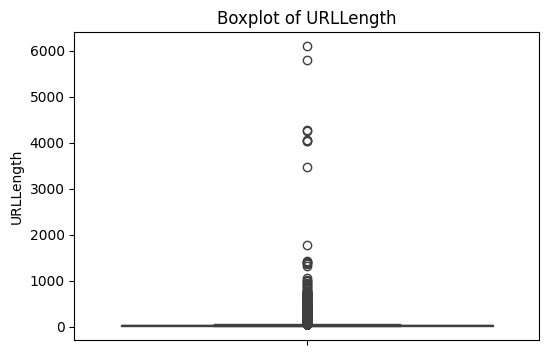

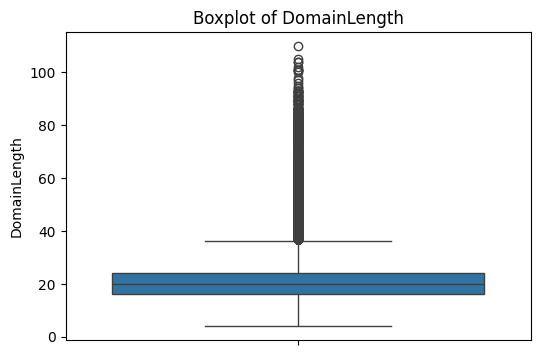

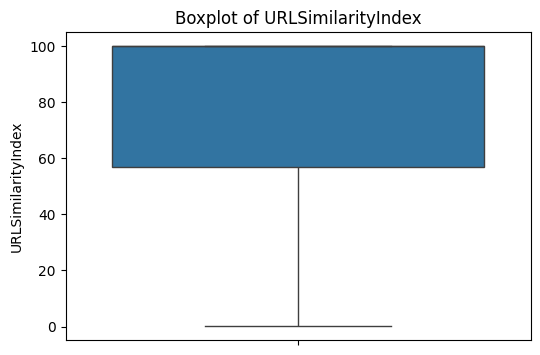

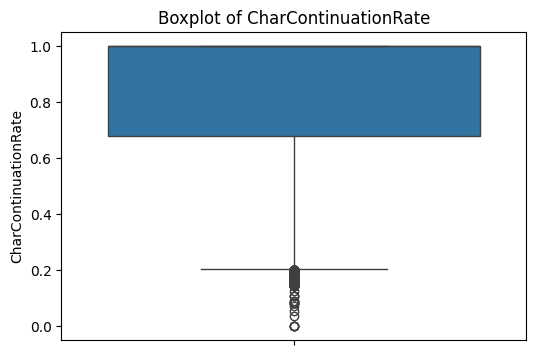

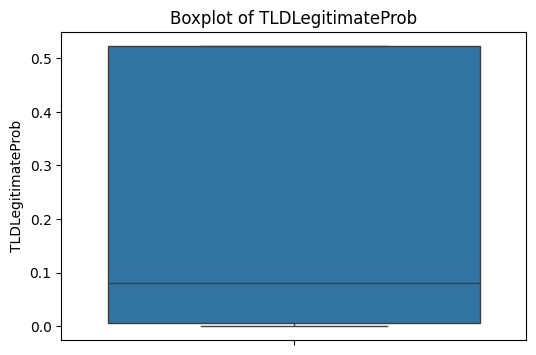

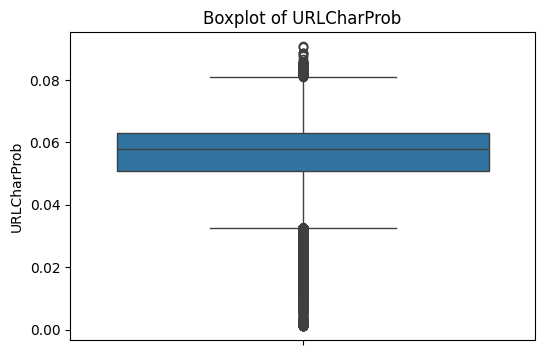

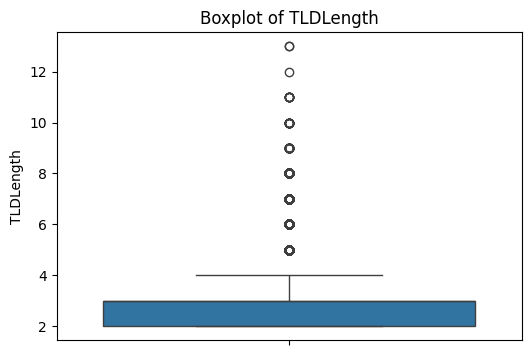

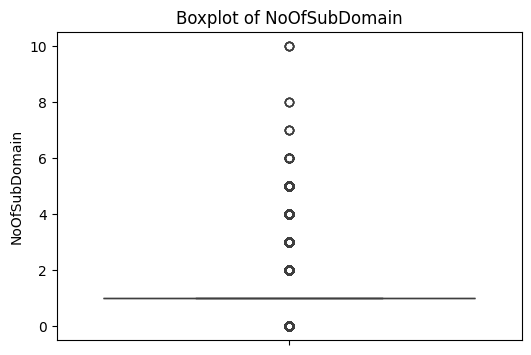

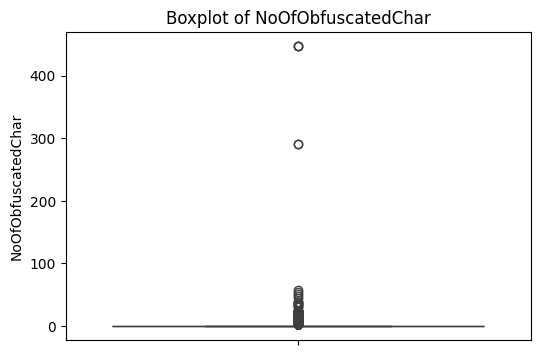

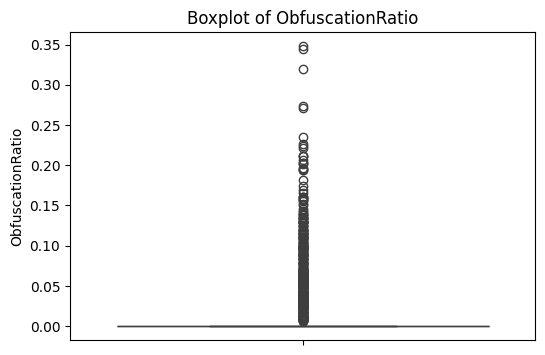

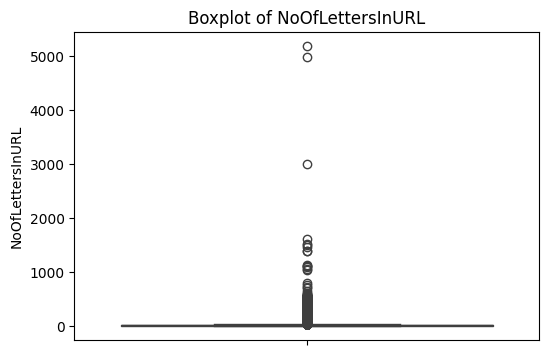

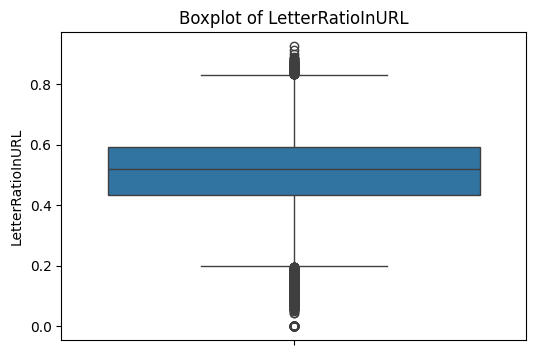

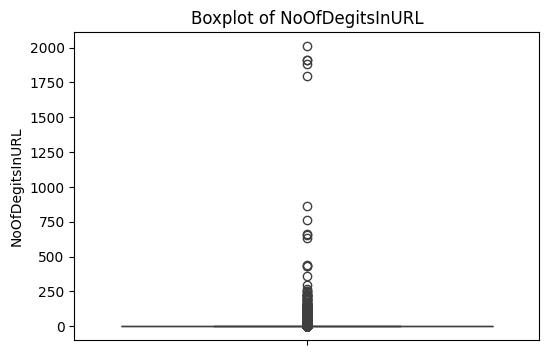

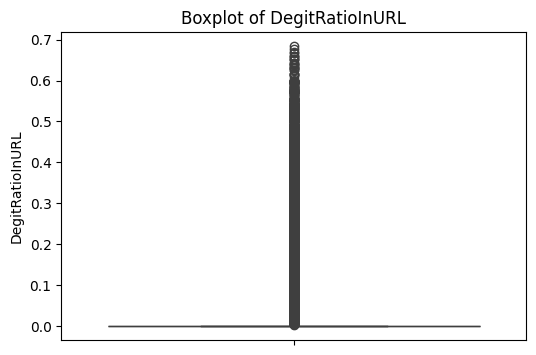

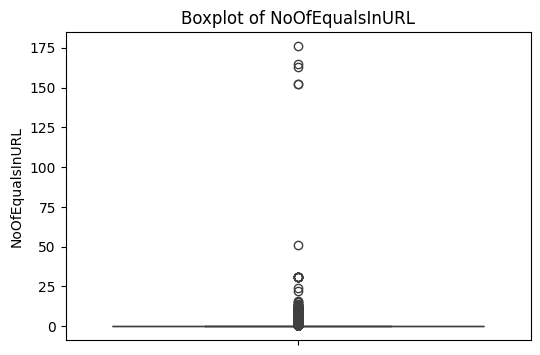

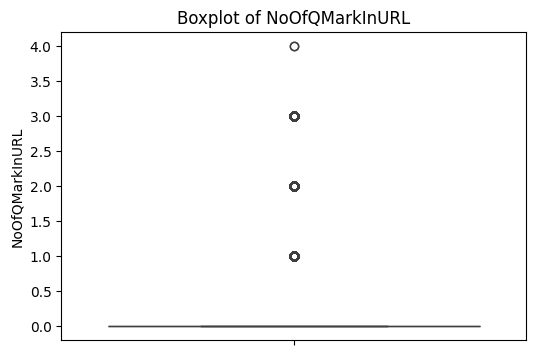

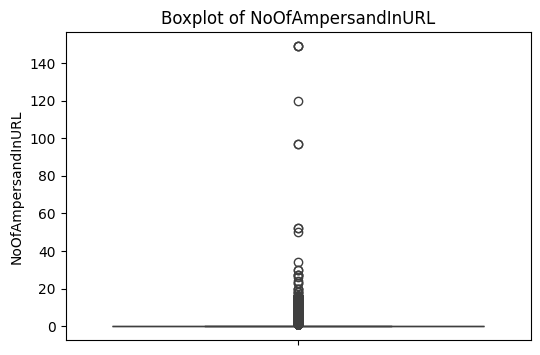

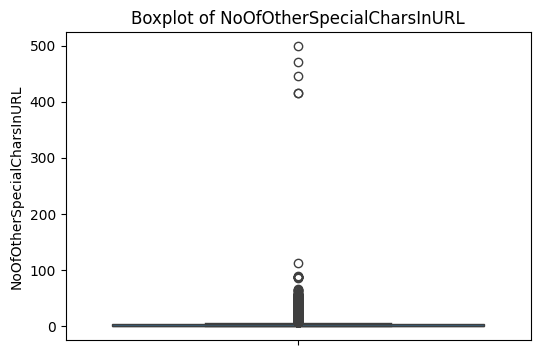

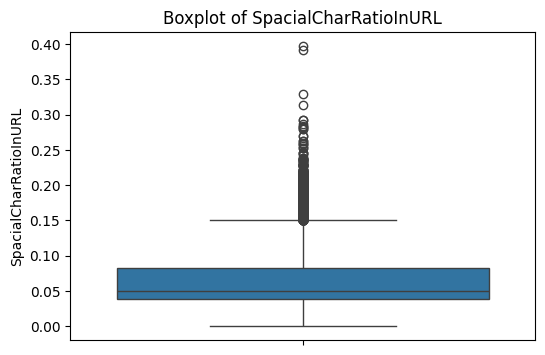

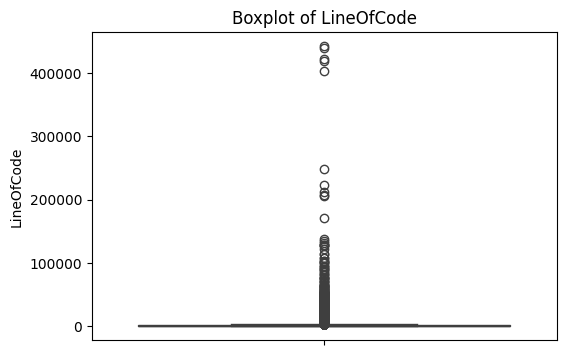

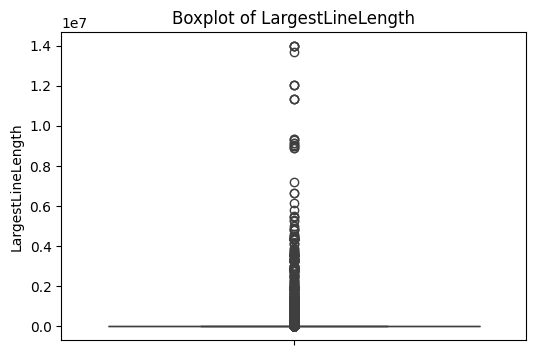

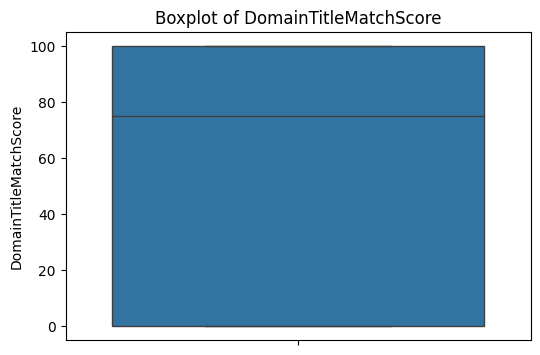

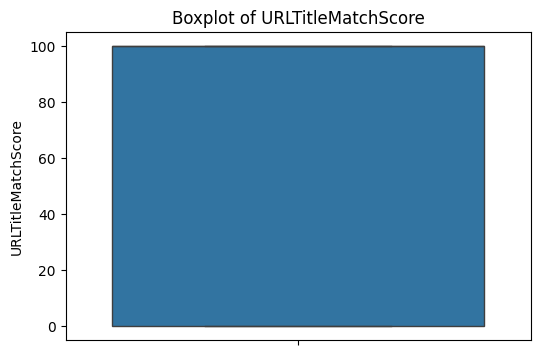

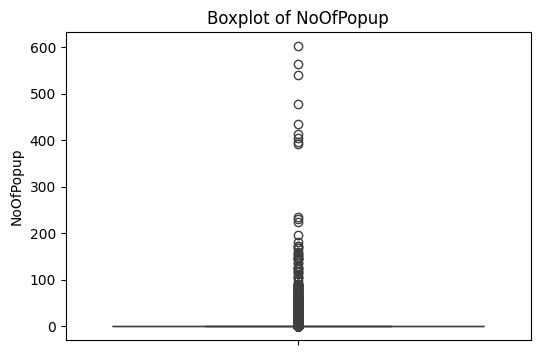

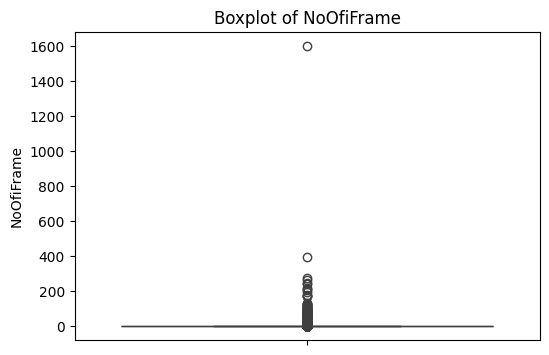

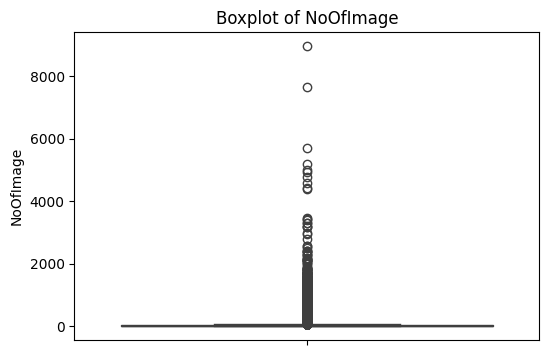

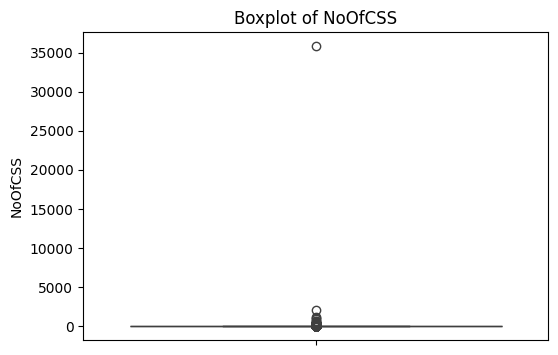

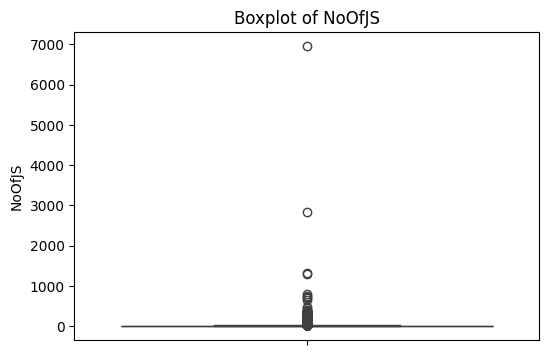

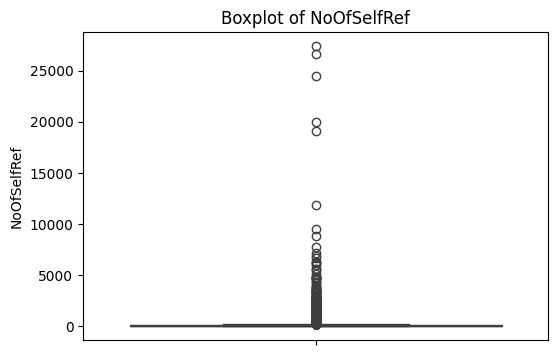

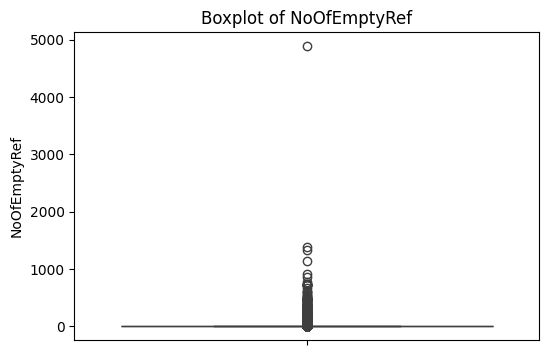

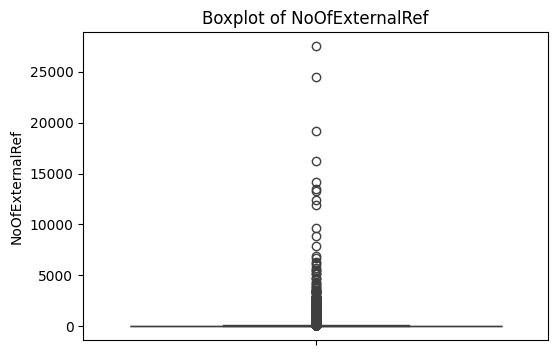

In [40]:
for col in other_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df4[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


## check skewness

In [41]:
df4[other_columns].skew()

URLLength                      53.321737
DomainLength                    2.513397
URLSimilarityIndex             -0.989903
CharContinuationRate           -1.128591
TLDLegitimateProb               0.073090
URLCharProb                    -1.064291
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
LetterRatioInURL               -0.066358
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
DomainTitleMatchScore          -0.008735
URLTitleMatchScore             -0.089085
NoOfPopup                      84.952694
NoOfiFrame      

In [42]:
# df4[other_columns].kurtosis()

## categorized the skewed columns into positively skewed and negatively skewed groups:

In [43]:
#To find right skewed columns
right_skewed_cols = df4[other_columns].skew()[df4[other_columns].skew() > 1].index.tolist()
df4[right_skewed_cols].skew()

URLLength                      53.321737
DomainLength                    2.513397
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
NoOfPopup                      84.952694
NoOfiFrame                     97.677347
NoOfImage                      28.230253
NoOfCSS                       464.404031
NoOfJS                        140.435761
NoOfSelfRef                    60.381378
NoOfEmptyRef                  106.826225
NoOfExternalRef                65.900247
dtype: float64

In [44]:
from scipy.stats import boxcox
for col in right_skewed_cols:
    skewness = df4[col].skew()
    if skewness > 1:  # Highly skewed
        df4[col], _ = boxcox(df4[col] + 1) #using boxcox method for removing right skewness
df4[right_skewed_cols].skew() 

URLLength                      0.095034
DomainLength                  -0.046918
TLDLength                     -0.014492
NoOfSubDomain                  0.035998
NoOfObfuscatedChar            21.981435
ObfuscationRatio              21.981435
NoOfLettersInURL              -0.108138
NoOfDegitsInURL                1.390798
DegitRatioInURL                1.457255
NoOfEqualsInURL                6.378214
NoOfQMarkInURL                 5.957591
NoOfAmpersandInURL            16.212384
NoOfOtherSpecialCharsInURL     0.497004
SpacialCharRatioInURL          0.279246
LineOfCode                    -0.103982
LargestLineLength              0.013555
NoOfPopup                      3.826578
NoOfiFrame                     0.802904
NoOfImage                      0.057420
NoOfCSS                        0.140952
NoOfJS                         0.017867
NoOfSelfRef                    0.066672
NoOfEmptyRef                   0.929639
NoOfExternalRef                0.061736
dtype: float64

## To find Left skewed columns

In [45]:
left_skewed_cols = df4[other_columns].skew()[df4[other_columns].skew() <-1 ].index.tolist()
df4[left_skewed_cols].skew()

CharContinuationRate   -1.128591
URLCharProb            -1.064291
dtype: float64

In [46]:
# Apply square transformation
for col in left_skewed_cols:
     df4[col] = df4[col] ** 2
df4[left_skewed_cols].skew()

CharContinuationRate   -0.832204
URLCharProb            -0.399044
dtype: float64

In [47]:
# Step 1: Recalculate skewness after Box-Cox transformation
updated_skewness = df4[right_skewed_cols].skew()

# Step 2: Identify columns still highly skewed (skewness > 1)
highly_skewed_cols = updated_skewness[updated_skewness > 1].index.tolist()

# Step 3: Drop only those highly skewed columns
df4.drop(columns=highly_skewed_cols, inplace=True)

# Verify if they are removed
print("Remaining columns in df4:", df4.columns)


Remaining columns in df4: Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],
      dtype='object')


### Removing highly skewed data ensures better model performance, improves interpretability, and avoids distortions in predictions.

In [48]:
df5 = df4.copy()

In [49]:
print("Shape of df5:", df5.shape)
print("Columns in df5:", df5.columns)


Shape of df5: (235795, 44)
Columns in df5: Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],
      dtype='object')


In [50]:
# Keep only existing columns
other_columns = [col for col in other_columns if col in df5.columns]
df5[other_columns].skew()

URLLength                     0.095034
DomainLength                 -0.046918
URLSimilarityIndex           -0.989903
CharContinuationRate         -0.832204
TLDLegitimateProb             0.073090
URLCharProb                  -0.399044
TLDLength                    -0.014492
NoOfSubDomain                 0.035998
NoOfLettersInURL             -0.108138
LetterRatioInURL             -0.066358
NoOfOtherSpecialCharsInURL    0.497004
SpacialCharRatioInURL         0.279246
LineOfCode                   -0.103982
LargestLineLength             0.013555
DomainTitleMatchScore        -0.008735
URLTitleMatchScore           -0.089085
NoOfiFrame                    0.802904
NoOfImage                     0.057420
NoOfCSS                       0.140952
NoOfJS                        0.017867
NoOfSelfRef                   0.066672
NoOfEmptyRef                  0.929639
NoOfExternalRef               0.061736
dtype: float64

In [51]:
df5.head(10)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,0.695714,2.212064,0,com,100.0,1.000000,0.522907,0.003836,1.184213,0.725441,...,0,0,1,3.154417,2.084135,3.217430,4.222536,0.000000,4.099783,1
1,0.693184,2.030839,0,Other,100.0,0.444444,0.032650,0.002521,0.968963,0.725441,...,0,0,1,3.445522,1.720117,2.132741,3.347061,0.000000,4.489421,1
2,0.695233,2.174348,0,Other,100.0,0.751111,0.028555,0.004112,0.968963,1.181210,...,0,0,1,2.210788,0.952175,2.021625,3.406292,0.517360,1.684386,1
3,0.694347,2.109340,0,com,100.0,1.000000,0.522907,0.003318,1.184213,0.725441,...,1,1,1,1.322323,2.206987,2.670442,2.886159,0.418901,3.078881,1
4,0.696127,2.246186,0,Other,100.0,1.000000,0.079963,0.003533,1.184213,0.725441,...,1,0,1,4.581111,1.959005,3.388557,3.832835,0.418901,3.829175,1
5,0.695483,2.193697,0,Other,100.0,1.000000,0.079963,0.003674,1.184213,0.725441,...,0,0,1,3.176461,0.632798,2.402646,3.971583,0.000000,2.467810,1
6,0.693995,2.084908,0,com,100.0,1.000000,0.522907,0.004039,1.184213,0.725441,...,0,0,1,3.108235,1.308325,2.610547,3.443408,0.517360,2.617814,1
7,0.693995,2.084908,0,com,100.0,1.000000,0.522907,0.003659,1.184213,0.725441,...,0,0,1,2.887796,0.952175,3.005282,3.282953,0.000000,2.521127,1
8,0.695233,2.174348,0,Other,100.0,1.000000,0.005084,0.003247,0.968963,0.725441,...,0,0,1,3.705638,1.308325,2.231837,3.367310,0.418901,4.745443,1
9,0.690212,1.851474,0,Other,100.0,1.000000,0.079963,0.004970,1.184213,0.725441,...,0,0,1,2.210788,0.632798,2.477366,4.507155,0.597418,3.633331,1


## Label Encoding TDS

In [53]:
df5['TLD'].value_counts()

TLD
Other    123241
com      112554
Name: count, dtype: int64

In [54]:
df5['TLD_encoded'] = df5['TLD'].map({'com': 1, 'Other': 0})
df5.head(3)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,0.695714,2.212064,0,com,100.0,1.000000,0.522907,0.003836,1.184213,0.725441,...,0,1,3.154417,2.084135,3.217430,4.222536,0.00000,4.099783,1,1
1,0.693184,2.030839,0,Other,100.0,0.444444,0.032650,0.002521,0.968963,0.725441,...,0,1,3.445522,1.720117,2.132741,3.347061,0.00000,4.489421,1,0
2,0.695233,2.174348,0,Other,100.0,0.751111,0.028555,0.004112,0.968963,1.181210,...,0,1,2.210788,0.952175,2.021625,3.406292,0.51736,1.684386,1,0


In [55]:
#we can drop TLD column
df6 = df5.drop('TLD',axis=1)
df6.head(2)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,0.695714,2.212064,0,100.0,1.000000,0.522907,0.003836,1.184213,0.725441,0,...,0,1,3.154417,2.084135,3.217430,4.222536,0.0,4.099783,1,1
1,0.693184,2.030839,0,100.0,0.444444,0.032650,0.002521,0.968963,0.725441,0,...,0,1,3.445522,1.720117,2.132741,3.347061,0.0,4.489421,1,0


## Correlation

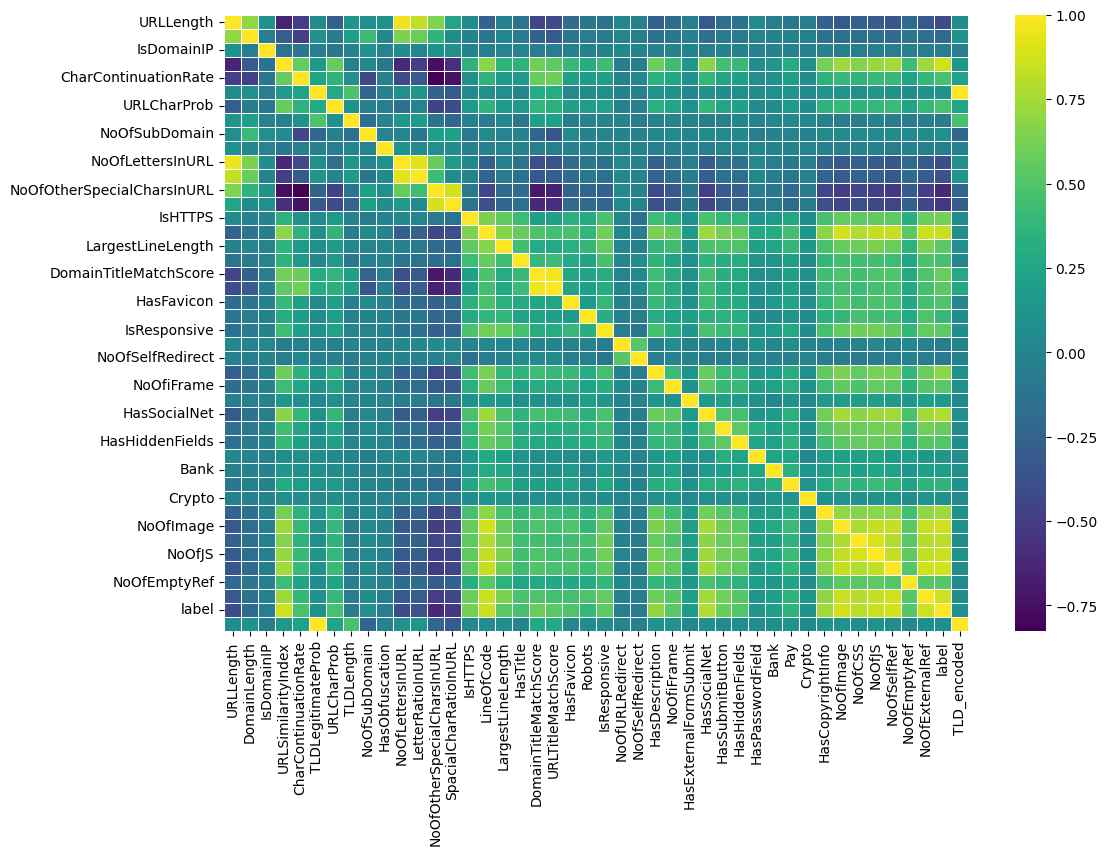

In [68]:
corr = df6.corr()
# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="viridis", linewidths=0.5) #magma 
plt.show()

In [69]:
df6.shape

(235795, 44)

### Sampling 50,000 instances to speed up model execution before performing data splitting.

In [70]:
X = df6.drop('label',axis=1)
y =  df6['label']

In [73]:
df_sampled = df6.sample(n=50000, replace=False)
X_subset = df_sampled.drop('label', axis=1)
y_subset = df_sampled['label']

In [80]:
X_subset.head(3)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,TLD_encoded
26188,0.693610,2.058812,0,100.000000,1.0,0.522907,0.004246,1.184213,0.725441,0,...,0,0,1,1.685864,1.308325,1.895220,2.628563,0.589639,2.780725,1
14779,0.695483,2.193697,0,100.000000,1.0,0.522907,0.003650,1.184213,0.725441,0,...,0,0,0,2.039419,2.084135,2.402646,3.560847,0.000000,3.482430,1
235006,0.698844,2.030839,0,24.231405,1.0,0.522907,0.000828,1.184213,0.000000,0,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.676669,1


## Feature Selection Using SelectKBest

In [81]:
sk = SelectKBest(score_func = f_classif, k=15)

In [82]:
X_new = sk.fit_transform(X_subset,y_subset)

In [83]:
selected_features = X_subset.columns[sk.get_support()]
selected_features

Index(['URLSimilarityIndex', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS',
       'LineOfCode', 'DomainTitleMatchScore', 'IsResponsive', 'HasDescription',
       'HasSocialNet', 'HasSubmitButton', 'HasCopyrightInfo', 'NoOfImage',
       'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfExternalRef'],
      dtype='object')

In [86]:
feature_score = pd.DataFrame({'Feature':X_subset.columns,'score':sk.scores_}).sort_values(by='score' ,ascending=False)

In [87]:
print(selected_features )
print("/nfeature scores:")
print(feature_score)

Index(['URLSimilarityIndex', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS',
       'LineOfCode', 'DomainTitleMatchScore', 'IsResponsive', 'HasDescription',
       'HasSocialNet', 'HasSubmitButton', 'HasCopyrightInfo', 'NoOfImage',
       'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfExternalRef'],
      dtype='object')
/nfeature scores:
                       Feature          score
39                 NoOfSelfRef  161316.359022
36                   NoOfImage  149623.144548
41             NoOfExternalRef  148466.709671
3           URLSimilarityIndex  143976.382983
15                  LineOfCode  127694.813279
38                      NoOfJS  127092.246680
37                     NoOfCSS   92658.033946
28                HasSocialNet   80849.297612
35            HasCopyrightInfo   62030.954369
25              HasDescription   45823.307158
12  NoOfOtherSpecialCharsInURL   30787.038708
14                     IsHTTPS   28973.039849
18       DomainTitleMatchScore   26060.607446
29             HasSubmitButt

In [89]:
X_selected = X_subset[selected_features]
X_selected.head(2)

,URLSimilarityIndex,NoOfOtherSpecialCharsInURL,IsHTTPS,LineOfCode,DomainTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef
26188,100.0,0.400201,1,8.204906,100.0,0,1,1,0,1,1.685864,1.308325,1.895220,2.628563,2.780725
14779,100.0,0.400201,1,10.990235,100.0,1,1,1,0,0,2.039419,2.084135,2.402646,3.560847,3.482430


## Using Standard Scaling

In [90]:
scaler = StandardScaler()

In [92]:
X_scaled = scaler.fit_transform(X_selected)
X_scaled

array([[ 0.74746653, -0.85400243,  0.52551052, ...,  0.25375366,
         0.25027138,  0.43809664],
       [ 0.74746653, -0.85400243,  0.52551052, ...,  0.64142291,
         0.73158708,  0.87189427],
       [-1.85905405,  1.52602913,  0.52551052, ..., -1.19417941,
        -1.10679147, -0.86264275],
       ...,
       [ 0.74746653, -0.85400243,  0.52551052, ...,  1.18768545,
         1.12881599,  1.38275077],
       [ 0.74746653, -0.85400243,  0.52551052, ...,  1.00361238,
         0.91954985,  1.05339601],
       [ 0.74746653,  0.56601105,  0.52551052, ...,  1.76568645,
         0.90947709,  1.08625442]])

## Train Test Split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_subset,test_size=0.2,random_state=42)

In [96]:
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape) 
print("y_test shape:", y_test.shape) 

X_train shape: (40000, 15)
X_test shape: (10000, 15)
y_train shape: (40000,)
y_test shape: (10000,)
